In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


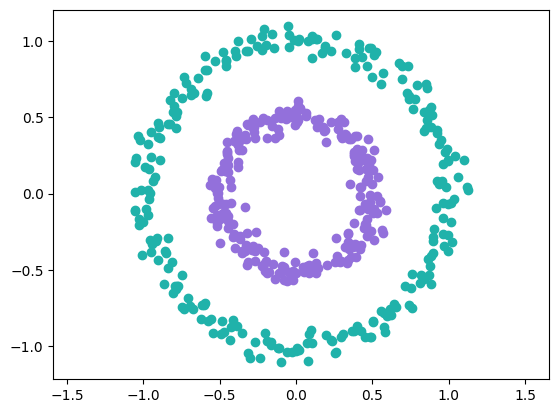

In [ ]:
#CREAR EL DATASET

#nombre de registres en les nostres dades
n= 500
#nombre de característiques de cada un dels registres en les dades.
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise = 0.05)

Y = Y[:, np.newaxis]
 #Y un vector binari que correspon a les dos classes que podem tenir. (si pertany a un cercle o l'altre.)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="lightseagreen") #podem no fer-ho però aquí distingeixo els dos eixos (dos cercles per a diferenciar mes les dades)
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c ="mediumpurple")
plt.axis('equal') #per a fer el plot més estètic, dos eixos amb la mateixa proporció.
plt.show()

In [ ]:
#per a tenir el codi mes ordenat, agafem una nova perspectiva. Com que totes les formules en una red neuronal són vectoritzables, si pensem que
#dins d'una mateixa capa totes les neurones reben els mateixos càlculs i modificacions, podriem dir que cada capa es un mòdul.

#CLASSE DE LA CAPA N DE LA RED

class neural_layer():

 #paràmetres que li passarem a la classe (els de la capa: w i b)
  def __init__(self, n_conn, n_neur, act_f ):
    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


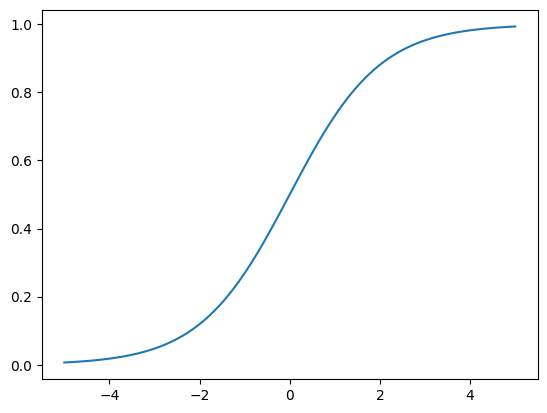

In [ ]:
#FUNCIONS D'ACTIVACIÓ

#funció sigmoide, distorciona en un rang de 0 a 1.
sigm = (lambda x: 1 / (1+ np.e **(-x)),
        lambda x: x * (1-x)) #avançem feina i definim la derivada de la funció perque ho necessitarem.

relu = lambda x: np.maximum(0, x) #definim la funció relu, encara que sol usarem una de les dos.

_x = np.linspace(-5, 5, 100) #creem una variable que vagi de -5 a 5 linealment i ens generi 100 valors (un vector)
plt.plot(_x, sigm[0](_x)) #creem un plot on a l'eix x ens mostra la variable i al y el resultat de pasar la variable per la funció sigm.

In [ ]:
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]): #ens dona l'index i els objectes del vector que s'està recorrent.
  #li diem que ho recorri tot menys la última posició per a no causar un overflow.

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

In [ ]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #calculem l'error quadràtic mitjà. Definim la funció d'error.
           lambda Yp, Yr: (Yp - Yr)) #derivada de la funció de cost.


def train(neural_net, X, Y, l2_cost, lr = 0.5, train=True):  #lr --> valor pel qual multipliquem al vector gradient en lalgorisme del descens del gradient que determina com es mourà.

  out = [(None, X)] #creem un vector on nem guardant els parells d'informació  de valor de suma ponderada i valor d'activació de totes les capes.

  #Forward pass. Agafem el nostre vector d'entrada i pasarlo capa per capa executant les operacoins que es realitzen en cada neurona. (fer la suma ponderada i passar-la a la funció d'activació.)
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

      #Backward Pass

      deltas = []

      for l in reversed(range(len(neural_net))):

        z = out[l+1][0]                                  #els tamanys que tindrien les capes si nessam enrrere.
        a = out[l+1][1]

       #calc delta última capa

        if l == len(neural_net) -1:                                        #pq els index començen en 0
          deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #implementació de la fòrmula.


        else:
          #calc delta respecte la capa previa
          deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

        _W = neural_net[l].W

          #Gradient descent.

        neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0) * lr
        neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]


train(neural_net, X, Y, l2_cost, 0.5)



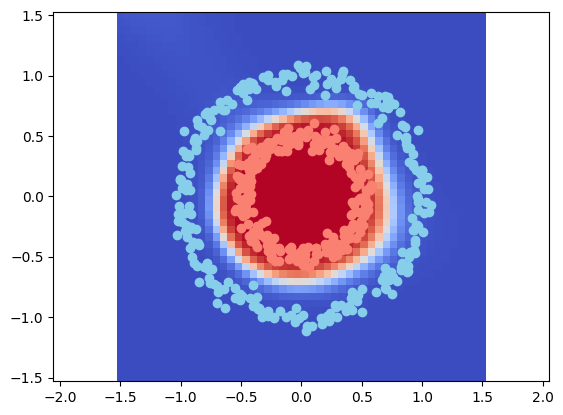

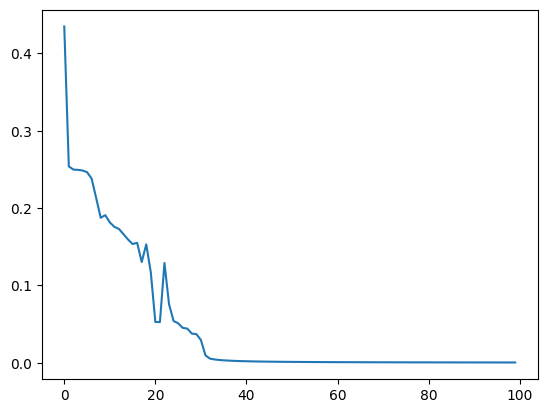

0.0003488005177842126
0.00034859828635181074
0.0003483962786990304
0.00034819449445849614
0.0003479929332636282
0.00034779159474864976
0.0003475904785485796
0.0003473895842992326
0.0003471889116372171
0.00034698846019993047
0.00034678822962555777
0.00034658821955307217
0.0003463884296222318
0.0003461888594735759
0.000345989508748423
0.00034579037708886844
0.0003455914641377875
0.0003453927695388267
0.0003451942929364029
0.00034499603397570336
0.0003447979923026841
0.0003446001675640653
0.00034440255940733025
0.00034420516748072383


In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    loss.append (l2_cost[0](pY, Y))

    res = 50

    _x0 = np. linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):#for i0, x0 in enumerate(_х0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0]==0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0]==1, 1], c="salmon")

    clear_output(wait=True)
    plt. show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)